In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('FuelConsumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.shape

(1067, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## We want to investigate the relationship between Engine size and CO2 Emission rate of the vechiles

# Preprocessing 
This is regression so make sure that the variabels under study are continous numerical variables 

### It is always advised to transfer the attributes under study to a new dataframe 

In [7]:
df = data[['ENGINESIZE', 'CO2EMISSIONS']]

In [8]:
df['ENGINESIZE'].corr(df['CO2EMISSIONS'])

0.8741543683958127

In [9]:
correlation=df.corr(method='pearson')
correlation
# correlation in quite significant

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


In [10]:
df.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [11]:
pd.isnull(df).values.sum()
# Finding null values 

0

Text(0, 0.5, 'CO2 Emission')

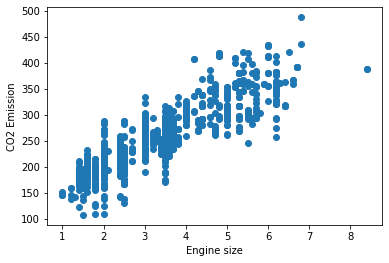

In [12]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

 X is your features dataframe: means this dataframe should have data except the columns of label attribute, so u have to drop the label attribute to make X. Sklearn requires 2D array  for all the operations, so we have converted the dataframes into a 2D array

 y is the dataframe having only the label attribute or the attribute that we want to predict, here CO2 Emissions is the label attribute

In [13]:
from sklearn import preprocessing

In [14]:
X = np.array(df.drop(['CO2EMISSIONS'], 1))
y = np.array(df['CO2EMISSIONS'])
X = preprocessing.scale(X)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_11220\2378686593.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['CO2EMISSIONS'], 1))


In [15]:
print(X)

[[-0.9512918 ]
 [-0.66865251]
 [-1.30459092]
 ...
 [-0.24469358]
 [-0.10337393]
 [-0.10337393]]


# Train and Test
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems. Here we have used model_selection module to split into train and test data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print('Coeffecient: %.2f' % model.coef_)
print('Intercept: %.2f' % model.intercept_)

Coeffecient: 55.18
Intercept: 256.77


Text(0, 0.5, 'CO2 Emission')

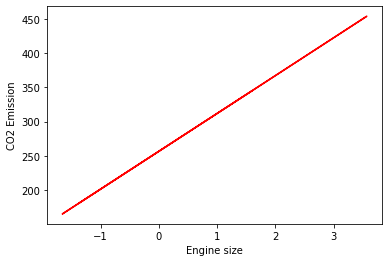

In [19]:
plt.plot(X_train, model.coef_*X_train + model.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

# Accuracy and Evaluation Metrics
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
<ul>
<li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. </li>
<li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. </li>
<li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
<li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). </li>

In [20]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.7615595731934373


In [21]:
from sklearn.metrics import r2_score

test_y_hat = model.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )

Mean absolute error: 24.10
Residual sum of squares (MSE): 985.94
R2-score: 0.68


# Prediction on a foriegn data

In [22]:
# have to pass new X as an array itself as whole model is built on numpy array
X_new = [[4.5]]
y_new = model.predict(X_new)
print('Predicted CO2 emission value is: %.2f' % y_new)

Predicted CO2 emission value is: 505.10
